# Assignment 3 – Topic Modeling and Clustering for Online Social Media Data

*Due: Friday January 12 at 14:00 CET*

In the third assignment of the course Applications of Machine Learning (INFOB3APML), you will learn to use topic modeling and clustering to identify topics in online social media data. The objectives of this assignment are:
- understand and process the text data
- use the clustering algorithm to determine clusters in real-life data
- use the Latent Dirichlet Allocation algorithm to identify discussed topics in real-life text data 
- use the visualization tools to validate the results of unsupervised learning and interpret your findings
- reflect on the difference between two type of unsupervised learning algorithms

In this assignment, you are going to discover the different ‘topics’ from a real social media text dataset. The project is divided into two parts (4 subtasks):

- The first part contains data processing (1.1) and feature extraction (1.2) from the raw text data.
- In the second part, you will implement two methods (2.1), a topic modeling method and a clustering method, to identify topics from the processed data. Then, the evaluation will be done by using visualization tools (2.2). 

Provided files:
- The dataset: data/raw_data.txt
- A tutorial notebook showcases some packages you could use for this assignment (optional): Ass3_tutorial.ipynb
- Some sample visualization codes for interpreting the topic results: viz_example.ipynb

In [4]:
import io
import spacy
import re
from tqdm import tqdm
import pickle
from emoji import demojize

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# TODO: import the packages


 ## Dataset:
 The data used in this assignment is Dutch text data. We collected the COVID-19 crisis related messages from online social media (Twitter) from January to November 2021. Then, a subset of raw tweets was randomly sampled. In total, our dataset includes the text data of about 100K messages. **To protect the data privacy, please only use this dataset within the course.**

In [2]:
# read the data

def phase0_open_txt_stream(filename):
    return io.open(filename, "r", encoding="utf-8")


pipe = phase0_open_txt_stream("../others/others/data/raw_data.txt")

all_messages = []

for message in pipe:
    all_messages.append(message.strip())

pipe.close()


In [22]:
print(f"{len(all_messages)} messages")

100701 messages


 ## 0. Before you start the Project: 
 The provided messages in the raw dataset were collected based on 10 different themes that relate to the COVID-19 crisis. Here is a list of all themes:
 -	Lockdown
 -	Face mask
 -	Social distancing
 -	Loneliness
 -	Happiness
 -	Vaccine
 -	Testing
 -  Curfew
 -  Covid entry pass
 -  Work from home

Before starting your project, you need to first filter the messages (all messages are in Dutch) and use the messages belonging to only one theme for the topic identification. 
 
If you have submitted the theme preference, you can skip the following paragraph.

*Please notice that there will be maximum two teams working on a same theme. In this way, we hope that each group will develop their own dataset and come up with interesting results.*

 ## 1.1 Data Processing
 In the first part of the assignment, please first filter the messages and use the messages belonging to your allocated theme for the identification of topics. For that you will need to:
 -	Design your query (e.g. a regular expression or a set of keywords) and filter the related messages for your allocated theme. 
 -	Clean your filtered messages and preprocess them into the right representation. Please refer to the text data pre-processing and representation methods discussed in the lecture. You may use some of the recommended packages for text data preprocessing and representation.

In [23]:
i = []
for mess in all_messages:
    if '' in mess:
        i.append(mess)
        
print(len(i))
print(i[0:5])

100701
["Hahah, het verzet is begonnen. Het knalt hier op z'n best hoor. Voor mijn dieren vind ik het erg, maar f@ck die maffe regering hier. Gelukkig nieuwjaar!", 'RT @D66Vught: Het is 2021! https://t.co/LpPuFPuqR8', '@MijumewAndCo Happy new year mij!', 'Fantastisch dat ik zoveel vuurwerk hoor..... We worden echt wakker yes. En het boeit mij niet wat een ander er van denkt.\\nOp naar een Great Awakening en happy new year 😃🎉🙏❤️', 'Gelukkig nieuwjaar allemaal!!!! Binnen exact een maand ben ik jarig en ik hoop dat ik dan eindelijk birthdaySEX kan hebben xxx']


In [24]:
# TODO: filter the related messages
facemask_messages = []

facemask_pattern = r"mondkap|(mond)?masker|bekluier|beklap|\bmask|muilkorf|facemask|face mask|monddoek|face shield|gelaats?scherm|gezichtsmasker|muilmasker|gezichtsbeschermingskapje|gezichtsschild|kap|eendenbek|gelaatsmasker|neus|mond|gezicht|hoest|nies|niezen|kuch|dragen|draag|medisch|aerosol|speeksel|longen|bescherm|1\.5|1,5|anderhal[fv]|luchtweg|filter"
for message in all_messages:
    if re.search(facemask_pattern, message.lower()):
        facemask_messages.append(message)

In [7]:
print(f"{len(facemask_messages)} messages about facemasks")

18662 messages about facemasks


In [8]:
facemask_messages[0:200]

['Echt hè? Ik gedraag me wel hoor. Uiteraard. 😊Gelukkig nieuwjaar allemaal. 🥂🍾 https://t.co/yygsc07uc7',
 '@WilmadeJong1 @mariannezw @HellieS8 Precies. Mondkapje, binnen blijven,  en angst verzwakken je immuunsysteem. Langdurig gebruik van een mondkapje kan zelfs schimmels veroorzaken die diep in de longen gaan zitten. Gevolg longontsteking. Bij ouderen zeer gevaarlijk!',
 'Kheb zoveel mooie outfits die ik ni heb kunne dragen door corona 🥺',
 '@Sandoka04120321 @BiancaLesman @telegraaf Dit moet stoppen!\\n\\n#GERRITSEN🗽 #PvdKB #TK2021🇳🇱 SAMEN STERK 👊\\n\\n#jeugdzorg #jeugdbescherming #school #onderwijs #rechtstaat\\n#ouders #kinderen #onrecht \\n#kindermishandeling #kindermisbruik #revolutie \\n#corona #covid #lockdown #mondkapjes #verkiezingen @PvdKB_ #neurenberg #rechten https://t.co/VfjAOP7tb9',
 '@RolandPierik @hugodejonge En daar is dus al die discussie over. Mondkapjes wel/niet, wie wel, wie niet, medisch/niet-medisch. Afstand houden, aerosolen, ventileren. Kerk en Ikea vs het spo

In [44]:
# TODO: clean and preprocess the messages

# V lowercasing
# V remove punctuation / special chars
# V stopword removal
# V remove of urls
# V tokenization
# V stemming / lemmatization
# X text normalization / representation

def lowercase_doc(doc: str) -> str:
    """
    Transform a document into lowercase.
    """
    return doc.lower()


def remove_urls(doc: str) -> str:
    """
    Return a document stripped of any URLs.
    """
    url_pattern = r"http[s]*\S+"
    clean_doc = re.sub(url_pattern, ' ', doc)
    return clean_doc


def remove_punctuation(doc: str) -> str: 
    """
    Transform a text document into a document without punctuation, digits, newline characters and twitter tags (@HugodeJonge, etc.).
    """
    doc = doc.replace('\\n', ' ')

    punct_pattern = r"@\w+\b|[^\w\s]|\d+"
    
    clean_doc = re.sub(punct_pattern, ' ', doc, )

    return clean_doc
    

def tokenize(doc: str, nlp, lemma = True) -> list:
    """
    Transform string document into a tokenized list.
    The lemma parameter specifiec whether to return lemmatized words or not.
    """
    if lemma:
        return [token.lemma_ for token in nlp(doc) if not token.is_stop]
    else:
        return [token for token in nlp(doc) if not token.is_stop]


def delete_only_consonant_words(doc: list) -> list:
    """
    Delete all words from a list containing only consonants (such as 'vs' or typos such as 'js' instead of 'is')
    """
    vowels = ['a', 'e', 'i', 'o', 'u', 'y']
    return [word for word in doc if any(vowel in word for vowel in vowels)]


In [45]:
nlp = spacy.load("nl_core_news_sm")

cleaned_messages = []

for sentence in all_messages:

    sentence = lowercase_doc(sentence)
    sentence = demojize(sentence)
    sentence = remove_urls(sentence)
    sentence = remove_punctuation(sentence)
    tokenized = tokenize(sentence, nlp)
    cleaned = delete_only_consonant_words(tokenized)

    cleaned_message = ' '.join(cleaned)
    cleaned_messages.append(cleaned_message)

In [46]:
with open("cleaned_messages.pkl", 'wb') as file:
    pickle.dump(cleaned_messages, file)

In [5]:
with open("cleaned_messages.pkl", "rb") as file:
    cleaned_messages = pickle.load(file)

In [6]:
len(cleaned_messages)

18662

In [33]:
for before, after in zip(facemask_messages[0:5], cleaned_messages[0:5]):
    print(f"Before cleaning:\n{before}\nAfter cleaning:\n{after}\n")

Before cleaning:
Echt hè? Ik gedraag me wel hoor. Uiteraard. 😊Gelukkig nieuwjaar allemaal. 🥂🍾 https://t.co/yygsc07uc7
After cleaning:
echt gedraag hoor uiteraard gelukkig nieuwjaar allemaal

Before cleaning:
@WilmadeJong1 @mariannezw @HellieS8 Precies. Mondkapje, binnen blijven,  en angst verzwakken je immuunsysteem. Langdurig gebruik van een mondkapje kan zelfs schimmels veroorzaken die diep in de longen gaan zitten. Gevolg longontsteking. Bij ouderen zeer gevaarlijk!
After cleaning:
mondkap blijven angst verzwakken immuunsysteem langdurig gebruik mondkap schimmel veroorzaken diep long gaan zitten gevolg longontsteking oud gevaarlijk

Before cleaning:
Kheb zoveel mooie outfits die ik ni heb kunne dragen door corona 🥺
After cleaning:
kheb mooi outfit ni kunne dragen corona

Before cleaning:
@Sandoka04120321 @BiancaLesman @telegraaf Dit moet stoppen!\n\n#GERRITSEN🗽 #PvdKB #TK2021🇳🇱 SAMEN STERK 👊\n\n#jeugdzorg #jeugdbescherming #school #onderwijs #rechtstaat\n#ouders #kinderen #onrecht \

In [7]:
# TODO: represent the messages into formats that can be used in clustering or LDA algorithms (you may need different represention for two algorithms)

# LDA input
vectorizer = CountVectorizer(min_df = 1)
lda_input = vectorizer.fit_transform(cleaned_messages)
lda_featurenames = vectorizer.get_feature_names_out()

In [8]:
# Clustering input
vectorizer = TfidfVectorizer()
vectorized = vectorizer.fit_transform(cleaned_messages)
clustering_input = vectorized.toarray()
clustering_featurenames = vectorizer.get_feature_names_out()


 ## 1.2 Exploratory Data Analysis
 After preprocessing the data, create at least 2 figures or tables that help you understand the data.

 While exploring the data, you may also think about questions such as:
 - Can you spot any differences between Twitter data and usual text data?
 - Does your exploration reveal some issues that would make it difficult to interpret the topics?
 - Can you improve the data by adding additional preprocessing steps?

In [14]:
# TODO: plot figure(s)


## 2.1 Topic modelling and clustering
 In the second part of the assignment, you will first:
 -	Implement a Latent Dirichlet Allocation (LDA) algorithm to identify the discussed topics for your theme
 -	Implement a clustering method  to cluster messages into different groups, then represent the topic of each cluster using a bag of words

While implementing the algorithms, you may use the codes from the recommended packages. In the final report, please explain reasons to select the used algorithm/package. 

In [49]:
# TODO: topic modeling using the LDA algorithm
from sklearn.decomposition import LatentDirichletAllocation as HyperLDA

lda = HyperLDA(
    n_components = 10,
    random_state = 8
)
lda.fit(lda_input)

LatentDirichletAllocation(random_state=8)

In [38]:
import gensim

words = [message.split() for message in cleaned_messages]
id2word = gensim.corpora.Dictionary(words)
corpus = [id2word.doc2bow(word) for word in words]

gensim_lda = gensim.models.LdaMulticore(
    num_topics = 10,
    corpus = corpus,
    id2word = id2word
)

In [50]:
from pprint import pprint
pprint(gensim_lda.print_topics())

[(0,
  '0.024*"mondkap" + 0.017*"afstand" + 0.014*"meter" + 0.012*"mens" + '
  '0.011*"houden" + 0.011*"gaan" + 0.010*"werken" + 0.005*"zeggen" + '
  '0.005*"mondkapjesplicht" + 0.005*"zitten"'),
 (1,
  '0.016*"mondkap" + 0.014*"mens" + 0.012*"gaan" + 0.011*"houden" + '
  '0.009*"afstand" + 0.006*"komen" + 0.006*"medisch" + 0.006*"lockdown" + '
  '0.006*"test" + 0.006*"willen"'),
 (2,
  '0.023*"mondkap" + 0.012*"meter" + 0.009*"afstand" + '
  '0.007*"mondkapjesplicht" + 0.007*"dragen" + 0.007*"maatregel" + '
  '0.007*"mens" + 0.006*"laten" + 0.006*"jaar" + 0.006*"houden"'),
 (3,
  '0.011*"mondkap" + 0.008*"mens" + 0.007*"corona" + 0.007*"komen" + '
  '0.006*"laten" + 0.006*"medisch" + 0.006*"jaar" + 0.006*"vaccinatie" + '
  '0.006*"maken" + 0.006*"meter"'),
 (4,
  '0.041*"mondkap" + 0.012*"gaan" + 0.009*"dragen" + 0.007*"maken" + '
  '0.007*"mens" + 0.007*"meter" + 0.007*"maatregel" + 0.006*"laten" + '
  '0.005*"lockdown" + 0.005*"blijven"'),
 (5,
  '0.024*"mondkap" + 0.013*"mens" + 0.

In [ ]:
# Printing the LDA results 
for i, component in enumerate(lda.components_):

    top_terms = sorted(zip(lda_featurenames, component), key = lambda x: x[1], reverse = True)[:10]
    top_terms = [term[0] for term in top_terms]
    print(f"Topic {i}: {top_terms}")

c:\Users\danie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\danie\AppData\Local\Programs\Python\Python39\lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\danie\AppData\Local\Programs\Python\Python39\lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


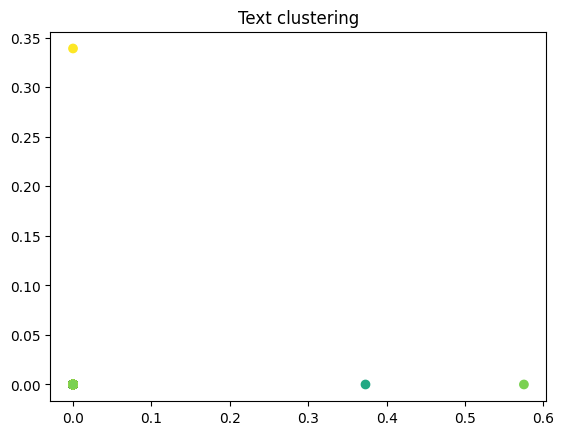

In [9]:
# TODO: cluster the messages using a clustering algorithm

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

k = 6

kmeans = KMeans(n_clusters = k, random_state = 9)
kmeans.fit(clustering_input)
labels = kmeans.labels_

plt.figure()
plt.scatter(clustering_input[:, 0], clustering_input[:, 1], c=labels, cmap='viridis')
plt.title("Text clustering")
plt.show()




# ???

 ## 2.2 Results, evaluation and Interpretation 
 
Finally, you will describe, evaluate and interpret your findings from two methods. 

- In the report, you need to describe and discuss the similarity and difference of results from two methods.
- While evaluating the results, human judgment is very important, so visualization techniques are helpful to evaluate the identified topics in an interpreted manner. 
    
1. For evaluating the topic modelling algorithm, please first use the interactive tool **[pyLDAvis](https://nbviewer.jupyter.org/github/bmabey/pyLDAvis/blob/master/notebooks/pyLDAvis_overview.ipynb#topic=0&lambda=1&term=)** to examine the inter-topic separation of your findings. 

2. For interpreting the identified topics / clusters of both algorithms, we provide example code for several visualization techiques. You can use multiple ones to evaluate your results or come up with visualisations on your own. The files contain examples for how to use the visualisation functions.


In [ ]:
# TODO: evaluation 


# Bonus Tasks 

We would like to challenge you with the following bonus task. For each task that is successfully completed, you may obtain max. 1 extra point. 

1. Implement another clustering algorithm or design your own clustering algorithm. Discuss your findings and explain why this is a better (or worse) clustering algorithm than the above one (the clustering algorithm, not LDA).

2. Can you think of other evaluation methods than the provided visualization techniques? If so, implement one and explain why it is a good evaluation for our task.